In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [7]:
%matplotlib notebook

In [8]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [9]:
##Force Calibration with single freq, with xyz2

In [54]:
Year = "2020"
Month = "07"
Day = "13"
BeadNumber =1
folder = r"/data/new_trap/"+ Year + Month + Day

In [55]:
ResX=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=35+i
    SigFreq=71
    fname = folder+"/Bead"+str(BeadNumber)+"/ForceCalibration0713"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResX[i]=np.sqrt(xpsd[SigFreq*10])
    print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.0005157209625847287
0.0005174704846150465
0.0005239691608472848
0.0005243486083409812
0.0005159737186473914


In [56]:
ResY=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=40+i
    fname = folder+"/Bead"+str(BeadNumber)+"/ForceCalibration0713"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResY[i]=np.sqrt(ypsd[SigFreq*10])    
    #print(np.sqrt(xpsd[SigFreq*10]))
    print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.0006027699296658483
0.0005902175705191303
0.0006025009156411094
0.000599161675615906
0.0006018607353564638


In [57]:
ResZ=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=30+i
    fname = folder+"/Bead"+str(BeadNumber)+"/ForceCalibration0713"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResZ[i]=np.sqrt(zpsd[SigFreq*10])    
    print(np.sqrt(zpsd[SigFreq*10]))
    

3192.4595073091014
3163.2821157970884
3135.9513200103074
2995.8933949586567
2989.8296499177327


In [58]:
q=3
V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)*np.sqrt(5)
print(F)

1.6244773848631612e-15


In [59]:
AveX=np.average(ResX)
AveY=np.average(ResY)
AveZ=np.average(ResZ)
BtoFx=F/AveX
BtoFy=F/AveY
BtoFz=F/AveZ
print(BtoFx)
print(BtoFy)
print(BtoFz)

3.1270222470990007e-12
2.7106149097395233e-12
5.247895986395284e-19


In [12]:
##code for Transfer Function- 7Hz

In [48]:
##X preparation
Ndata=2
Zset=4
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_X_z%de5_10s_7Hz.h5" % (Ndata,Zset)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
Tmeas=250
fsamp=5000
res=Tmeas*fsamp
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
#Noise0X=np.sqrt(xpsd[fbase*Tmeas])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [49]:
##Y preparataion
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_Y_z%de5_10s_7Hz.h5" % (Ndata,Zset)
data = BDF.xyz2 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
#Noise0Y=np.sqrt(ypsd[fbase*Tmeas]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [50]:
##Z preparation

fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_Z_z%de5_10s_7Hz.h5" % (Ndata,Zset)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
#Noise0Z=np.sqrt(zpsd[fbase*Tmeas])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No height data
No cantilever data
Error loading spinning data


In [51]:
#Here, there is no conversion factor
q=19
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100


FnoiseXX=XnoiseX
FnoiseXY=XnoiseY
FnoiseXZ=XnoiseZ
FnoiseYX=YnoiseX
FnoiseYY=YnoiseY
FnoiseYZ=YnoiseZ
FnoiseZX=ZnoiseX
FnoiseZY=ZnoiseY
FnoiseZZ=ZnoiseZ

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*Tmeas*(i+1)]
    TFXY[i]=FnoiseXY[fbase*Tmeas*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*Tmeas*(i+1)]
    TFYX[i]=FnoiseYX[fbase*Tmeas*(i+1)]
    TFYY[i]=FnoiseYY[fbase*Tmeas*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*Tmeas*(i+1)]
    TFZX[i]=FnoiseZX[fbase*Tmeas*(i+1)]
    TFZY[i]=FnoiseZY[fbase*Tmeas*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*Tmeas*(i+1)]

In [52]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFBead%d_Bit.txt" % (Ndata)

f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [44]:
## Plotting the force sensitivity with transfer function compensation

In [49]:
Ndata=68
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=296.519
gx=47.8492
w0y=295.348
gy=32.3525
w0z=259.874
gz=150.989

f0=71
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/data/new_trap/20200518/Bead2/InitialTest/Data68.h5
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


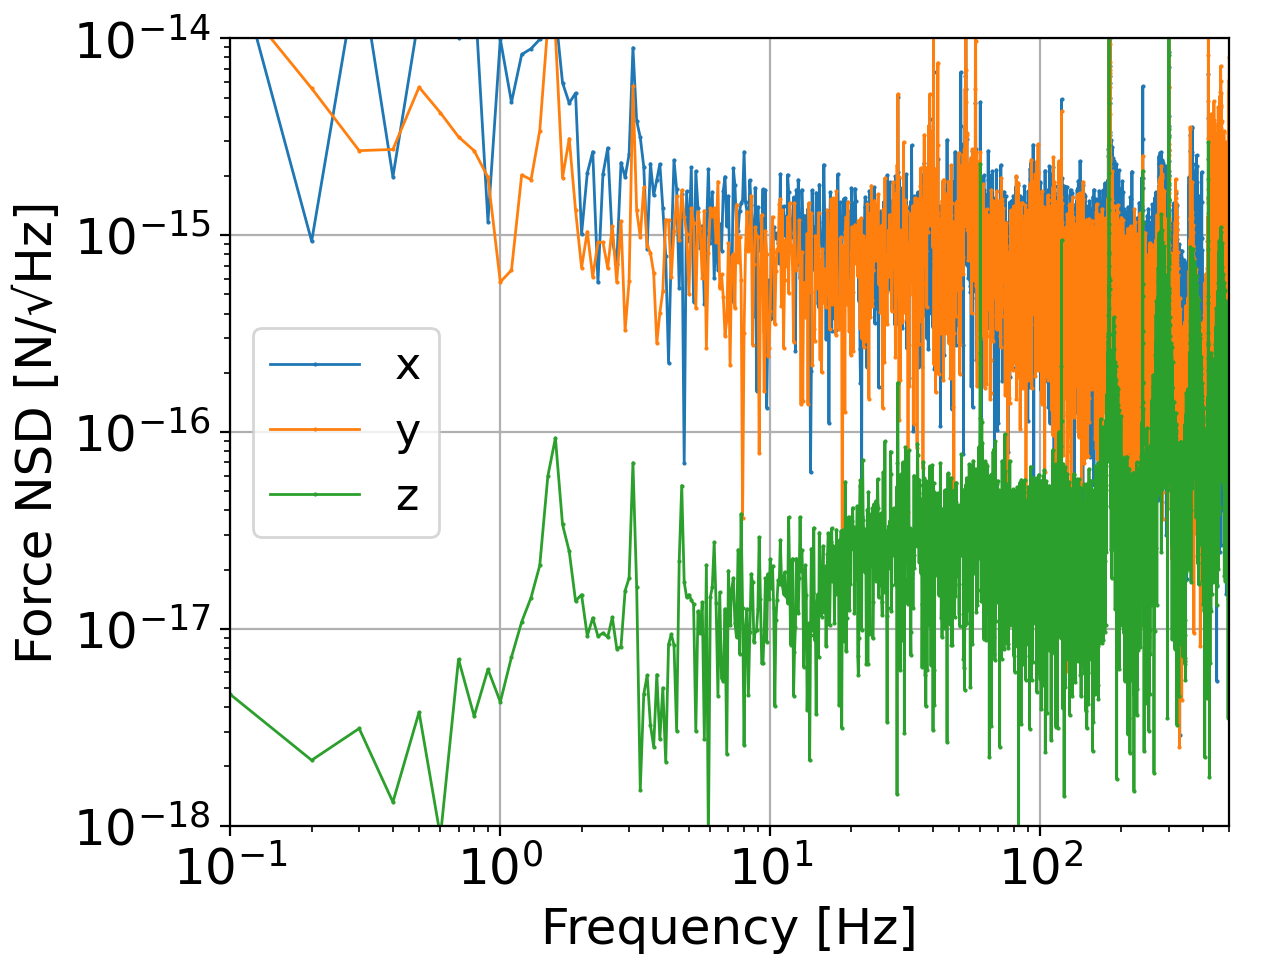

In [50]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(0.1,500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity%d.png" % Ndata

plt.savefig(ofname,dpi=300)

In [18]:
## 1-100 Hz Transfer Function Test

In [61]:
##X preparation
Ndata=5
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_X_z%de5_250s_1Hz.h5" % (Ndata,Zset)
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
tInt=250
Nharm=100
fsamp=5000
res=fsamp*tInt
fBase=1;

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)
XrespX=np.zeros(Nharm)
XrespY=np.zeros(Nharm)
XrespZ=np.zeros(Nharm)
for i in range (Nharm):
    XrespX[i]=XnoiseX[tInt*(i+1)]
    XrespY[i]=XnoiseY[tInt*(i+1)]
    XrespZ[i]=XnoiseZ[tInt*(i+1)]
    
XtfX=np.zeros(991)
XtfY=np.zeros(991)
XtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        XtfX[i*10+j]=0.1*XrespX[i]*(10-j)+0.1*XrespX[i+1]*j
        XtfY[i*10+j]=0.1*XrespY[i]*(10-j)+0.1*XrespY[i+1]*j
        XtfZ[i*10+j]=0.1*XrespZ[i]*(10-j)+0.1*XrespZ[i+1]*j
XtfX[990]=XrespX[99]
XtfY[990]=XrespY[99]
XtfZ[990]=XrespZ[99]

/data/new_trap/20200713/Bead1/TransFunc/TransFunc_5_X_z-4e5_250s_1Hz.h5
No height data
No cantilever data
Error loading spinning data
No laser power data


In [62]:
##Y preparation
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_Y_z%de5_250s_1Hz.h5" % (Ndata,Zset)
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)
YrespX=np.zeros(Nharm)
YrespY=np.zeros(Nharm)
YrespZ=np.zeros(Nharm)
for i in range (Nharm):
    YrespX[i]=YnoiseX[tInt*(i+1)]
    YrespY[i]=YnoiseY[tInt*(i+1)]
    YrespZ[i]=YnoiseZ[tInt*(i+1)]
    
YtfX=np.zeros(991)
YtfY=np.zeros(991)
YtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        YtfX[i*10+j]=0.1*YrespX[i]*(10-j)+0.1*YrespX[i+1]*j
        YtfY[i*10+j]=0.1*YrespY[i]*(10-j)+0.1*YrespY[i+1]*j
        YtfZ[i*10+j]=0.1*YrespZ[i]*(10-j)+0.1*YrespZ[i+1]*j
YtfX[990]=YrespX[99]
YtfY[990]=YrespY[99]
YtfZ[990]=YrespZ[99]

/data/new_trap/20200713/Bead1/TransFunc/TransFunc_5_Y_z-4e5_250s_1Hz.h5
No height data
No cantilever data
Error loading spinning data
No laser power data


In [63]:
##Z preparation
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_%d_Z_z%de5_250s_1Hz.h5" % (Ndata,Zset)
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2

data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)
ZrespX=np.zeros(Nharm)
ZrespY=np.zeros(Nharm)
ZrespZ=np.zeros(Nharm)
for i in range (Nharm):
    ZrespX[i]=ZnoiseX[tInt*(i+1)]
    ZrespY[i]=ZnoiseY[tInt*(i+1)]
    ZrespZ[i]=ZnoiseZ[tInt*(i+1)]
    
ZtfX=np.zeros(991)
ZtfY=np.zeros(991)
ZtfZ=np.zeros(991)

for i in range (99):
    for j in range(10):
        ZtfX[i*10+j]=0.1*ZrespX[i]*(10-j)+0.1*ZrespX[i+1]*j
        ZtfY[i*10+j]=0.1*ZrespY[i]*(10-j)+0.1*ZrespY[i+1]*j
        ZtfZ[i*10+j]=0.1*ZrespZ[i]*(10-j)+0.1*ZrespZ[i+1]*j
ZtfX[990]=ZrespX[99]
ZtfY[990]=ZrespY[99]
ZtfZ[990]=ZrespZ[99]

/data/new_trap/20200713/Bead1/TransFunc/TransFunc_5_Z_z-4e5_250s_1Hz.h5
No height data
No cantilever data
Error loading spinning data
No laser power data


In [62]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFintBit%d.txt" % Ndata

f1 = open(ofname,"a")
for i in range(991):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % ((0.1*(i+10)),XtfX[i],XtfY[i],XtfZ[i],YtfX[i],YtfY[i],YtfZ[i],ZtfX[i],ZtfY[i],ZtfZ[i]))

#    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
#                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [62]:
##force sensitivity

In [64]:
Ndata=44
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xnsd=np.sqrt(xpsd)
ynsd=np.sqrt(ypsd)
znsd=np.sqrt(zpsd)
f0=71
Xsens=np.zeros(991)
Ysens=np.zeros(991)
Zsens=np.zeros(991)

for i in range(991):
    Xsens[i]=xnsd[10+i]*XtfX[f0*10-10]/XtfX[i]*BtoFx
    Ysens[i]=ynsd[10+i]*YtfY[f0*10-10]/YtfY[i]*BtoFy
    Zsens[i]=znsd[10+i]*ZtfZ[f0*10-10]/ZtfZ[i]*BtoFz

/data/new_trap/20200713/Bead1/InitialTest/Data44.h5
No height data
No electrodes data
No cantilever data
No laser power data


<IPython.core.display.Javascript object>


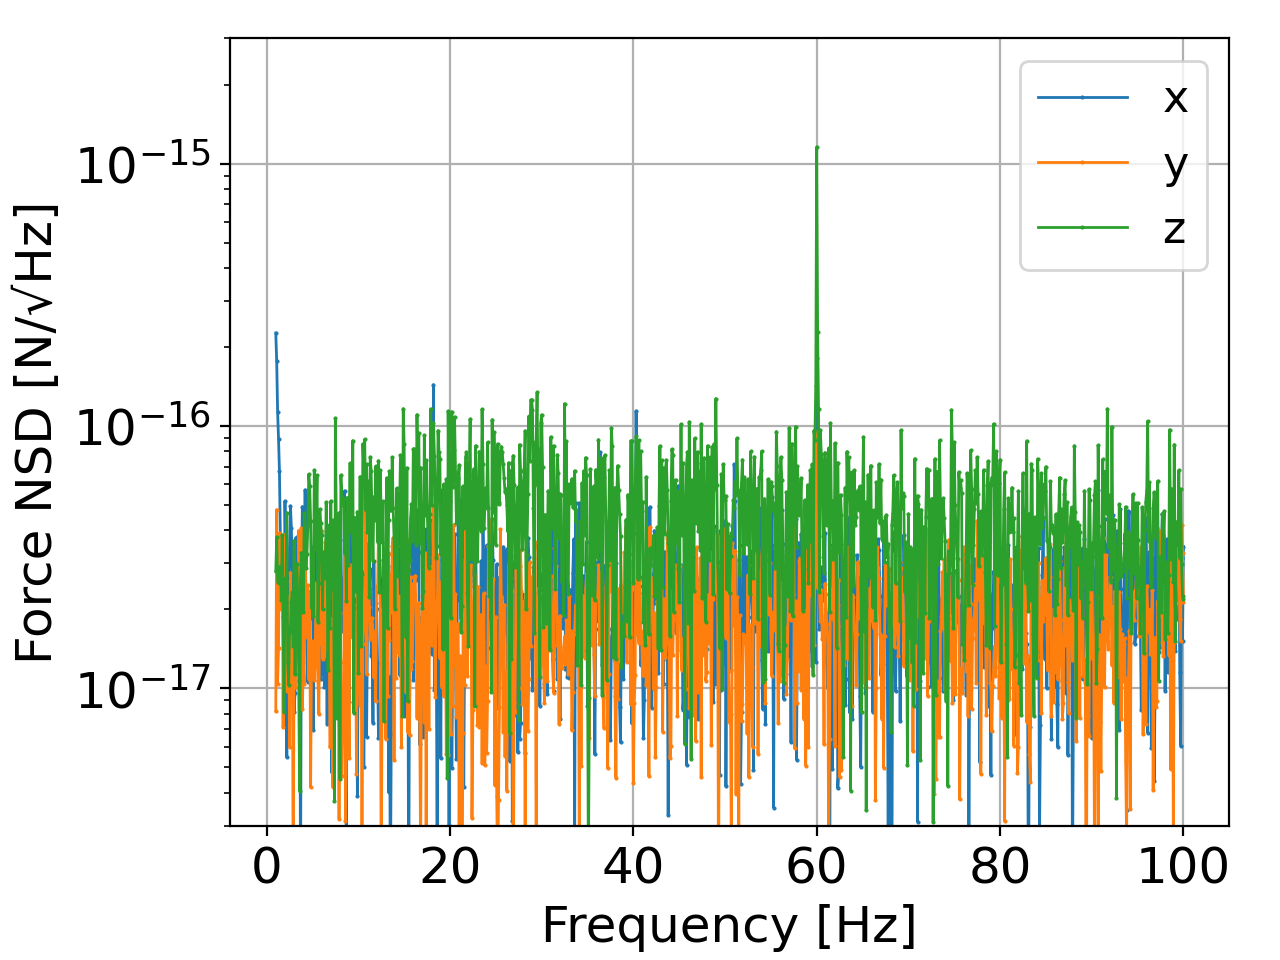

In [65]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.semilogy(np.linspace(1,100,991),Xsens, '.-', label="x",markersize=1,linewidth=1)
ax.semilogy(np.linspace(1,100,991),Ysens, '.-', label="y",markersize=1,linewidth=1)
ax.semilogy(np.linspace(1,100,991),Zsens, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
#plt.xlim(1,100)
plt.ylim(3e-18,3e-15)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity1-100HzSemi_%dNewDischarge.png" % Ndata

plt.savefig(ofname,dpi=300)

In [26]:
##combining the "#analyzing multiple data in single number,"  
##"##for Noise only analysis for sensitivity. Used bin of 3*n+0.7 Hz, Nint=0", and SortDataTo Harmonics

In [66]:
import scipy, sys, time

In [69]:
import time
start_time = time.time()

#DefineParameters
Ndata=7

Fshake=71
DataN=1000
HarmN=1
Noff=50
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithoutSpin0713/Discharge_%d.h5" % (NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=71

    xnsd=np.sqrt(xpsd)*BtoFx#*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy#*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz#*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

##save signal bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXSigAmp[k][i-1]=xnsd[Fshake*10*i]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXSigPha[k][i-1]=np.angle(xFFT[Fshake*10*i]) 
        DataSpaceYSigAmp[k][i-1]=ynsd[Fshake*10*i]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYSigPha[k][i-1]=np.angle(yFFT[Fshake*10*i]) 
        DataSpaceZSigAmp[k][i-1]=znsd[Fshake*10*i]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZSigPha[k][i-1]=np.angle(zFFT[Fshake*10*i]) 
        
##save noise bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXNoiAmp[k][i-1]=xnsd[Fshake*10*i-Noff]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXNoiPha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoiAmp[k][i-1]=ynsd[Fshake*10*i-Noff]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYNoiPha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoiAmp[k][i-1]=znsd[Fshake*10*i-Noff]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZNoiPha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithoutSpin0713/XSignal.txt" 
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXSigAmp[k][i-1], DataSpaceYSigAmp[k][i-1], DataSpaceZSigAmp[k][i-1], 
                                            DataSpaceXSigPha[k][i-1], DataSpaceYSigPha[k][i-1], DataSpaceZSigPha[k][i-1]))
    f1.close()
    ofname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithoutSpin0713/XNoise.txt" 
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoiAmp[k][i-1], DataSpaceYNoiAmp[k][i-1], DataSpaceZNoiAmp[k][i-1], 
                                            DataSpaceXNoiPha[k][i-1], DataSpaceYNoiPha[k][i-1], DataSpaceZNoiPha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
Total run time is  13.883404016494751  s


In [70]:
import time
start_time = time.time()

#DefineParameters
Ndata=7

Fshake=71
DataN=3000
HarmN=1
Noff=50
ArraySize=(DataN,HarmN)
DataSpaceXSigAmp=np.zeros(ArraySize)
DataSpaceYSigAmp=np.zeros(ArraySize)
DataSpaceZSigAmp=np.zeros(ArraySize)
DataSpaceXSigPha=np.zeros(ArraySize)
DataSpaceYSigPha=np.zeros(ArraySize)
DataSpaceZSigPha=np.zeros(ArraySize)

DataSpaceXNoiAmp=np.zeros(ArraySize)
DataSpaceYNoiAmp=np.zeros(ArraySize)
DataSpaceZNoiAmp=np.zeros(ArraySize)
DataSpaceXNoiPha=np.zeros(ArraySize)
DataSpaceYNoiPha=np.zeros(ArraySize)
DataSpaceZNoiPha=np.zeros(ArraySize)

for k in range(0,DataN):
##FFT the data
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithSpin0713/Discharge_%d.h5" % (NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(25000)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=71

    xnsd=np.sqrt(xpsd)*BtoFx#*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy#*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz#*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

##save signal bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXSigAmp[k][i-1]=xnsd[Fshake*10*i]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXSigPha[k][i-1]=np.angle(xFFT[Fshake*10*i]) 
        DataSpaceYSigAmp[k][i-1]=ynsd[Fshake*10*i]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYSigPha[k][i-1]=np.angle(yFFT[Fshake*10*i]) 
        DataSpaceZSigAmp[k][i-1]=znsd[Fshake*10*i]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZSigPha[k][i-1]=np.angle(zFFT[Fshake*10*i]) 
        
##save noise bin data to the array
    for i in range(1,(HarmN+1)):
        DataSpaceXNoiAmp[k][i-1]=xnsd[Fshake*10*i-Noff]/XtfX[Fshake*10*i-10]*XtfX[f0*10-10]
        DataSpaceXNoiPha[k][i-1]=np.angle(xFFT[Fshake*10*i-Noff]) 
        DataSpaceYNoiAmp[k][i-1]=ynsd[Fshake*10*i-Noff]/YtfY[Fshake*10*i-10]*YtfY[f0*10-10]
        DataSpaceYNoiPha[k][i-1]=np.angle(yFFT[Fshake*10*i-Noff]) 
        DataSpaceZNoiAmp[k][i-1]=znsd[Fshake*10*i-Noff]/ZtfZ[Fshake*10*i-10]*ZtfZ[f0*10-10]
        DataSpaceZNoiPha[k][i-1]=np.angle(zFFT[Fshake*10*i-Noff]) 
  
    if (k%100)==0:
        print(k)
        
##write the harmonics data
for i in range(1,(HarmN+1)):
    ofname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithSpin0713/XSignal.txt" 
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXSigAmp[k][i-1], DataSpaceYSigAmp[k][i-1], DataSpaceZSigAmp[k][i-1], 
                                            DataSpaceXSigPha[k][i-1], DataSpaceYSigPha[k][i-1], DataSpaceZSigPha[k][i-1]))
    f1.close()
    ofname = folder+"/Bead"+str(BeadNumber)+"/Millicharge"+"/WithSpin0713/XNoise.txt" 
    f1 = open(ofname,"a")
    for k in range(0,DataN):
        f1.write('%d %e %e %e %f %f %f\n' % (k, DataSpaceXNoiAmp[k][i-1], DataSpaceYNoiAmp[k][i-1], DataSpaceZNoiAmp[k][i-1], 
                                            DataSpaceXNoiPha[k][i-1], DataSpaceYNoiPha[k][i-1], DataSpaceZNoiPha[k][i-1]))
    f1.close()
    
print ("Total run time is ", time.time() - start_time, " s")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
Total run time is  221.18164134025574  s
